In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy import stats

In [2]:
def compute_FFC(base_run, pcr_run):
    a = base_run/np.sum(base_run)
    b = pcr_run/np.sum(pcr_run)
    old_settings = np.seterr(divide='ignore',invalid='ignore')
    ampratio = b/a
    return ampratio

def func(x,a,b):
    return a*x+b

In [3]:
"""
ready-to-sequence pool
run36: biased chip; no PCR
run42: biased chip; PCR
"""
counts36 = np.load("./data/run36.npy")
counts42 = np.load("./data/run42.npy")

In [4]:
seqs = []
with open("./seqs/P9-20161114-150-62-1.6M-ID37-AdapterSequencingPrimer-IndexAdapter.txt") as fr:
    for line in fr:
        seqs.append(line.rstrip("\n").split("-")[1])
        
GCs = []
for seq in seqs:
    GCCounts = seq.count('G') + seq.count('C')
    GCs.append(float(GCCounts)/len(seq))
GC_array = np.array(GCs)

In [5]:
ampratio = np.log2(compute_FFC(counts36, counts42))
ffc = ampratio[np.isfinite(ampratio)]
gc = GC_array[np.isfinite(ampratio)]
xdata, ydata = 100*gc, ffc
slope, intercept, r_value, p_value, std_err = stats.linregress(xdata, ydata)
y_fit = func(xdata, slope, intercept)
print "slope:", slope
print "p_value:", p_value
print "r-squared:", r_value**2

slope: 5.233144119255713e-05
p_value: 0.7619775547678641
r-squared: 5.972257451638687e-08


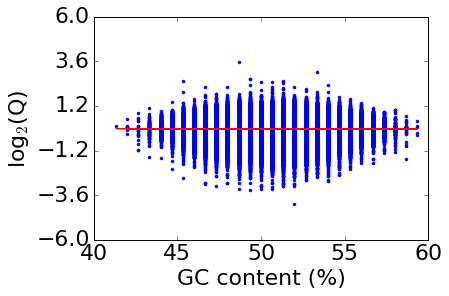

In [6]:
plt.matplotlib.rcParams.update({'font.size':22})
fig1, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
ax1.plot(xdata, ydata, '.', color = 'b', label="data")
ax1.plot(xdata, y_fit, 'r-', label='fit')
ax1.set_xlabel('GC content (%)')
ax1.set_ylabel('log$_2$(Q)')
ax1.set_ylim([-6, 6])
#ax1.set_xlim([25, 75])
#ax1.set_xticks(np.linspace(25,75,6))
ax1.set_yticks(np.linspace(-6,6,6))
plt.savefig('./figs/fig_GC_VS_ampLog_NHMO.png', dpi=300, bbox_inches='tight', format='png')

In [7]:
import seaborn as sns
plt.matplotlib.rcParams.update({'font.size':22})
g = sns.JointGrid(x="GC content (%)", y="log$_2$(Q)", data=df)
sns.set(font_scale=1.5)
g = g.plot_joint(plt.scatter, color="b", edgecolor="white")
_ = g.ax_marg_x.hist(df["GC content (%)"], color="b", alpha=.6, bins=28)
_ = g.ax_marg_y.hist(df["log$_2$(Q)"], color="b", alpha=.6,orientation="horizontal", bins=40)
plt.xlim([20,80])
plt.savefig('./figs/fig_GC_VS_ampLog_NHMO_dist2.png', dpi=300, bbox_inches='tight', format='png')

NameError: name 'df' is not defined